# Project: Investigate a Dataset - [No-show Appointment Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset contains information from 100k medical appointments and focuses on whether or not people attend their appointments. The data was obtained via Kaggle. Each row contains a number of characteristics about the subject. The dataset's variables are :

PatientID------- Patient's identity number

AppointmentID--- Patient's appointment number

Gender---------- Patient's Gender ("M" for Male, "F" for Female)

ScheduledDay---- The date and time patients booked their appointment

AppointmentDay-- The date and time patients were to show up for their appointment

Age------------- Patient's age

Neighbourhood--- Location of the hospital

Scholarship----- Whether or not a patient is enrolled in Brasilian welfare program (0= No, 1= Yes)

Hipertension---- Whether or not the patient is hypertensive (0= No, 1=Yes)

Diabetes-------- Whether or not the patient is diabetic (0= No, 1=Yes)

Alcoholism------ Whether or not the patient consumes alcohol (0= No, 1=Yes)

Handcap--------- Whether or not the patient is handicapped (0= No, 1=Yes)

SMS_received---- Whether or not the patient recieved SMS notification (0= No, 1=Yes)

No-show--------- Whether or not the patient showed up for their appointment ("No"= Showed Up, "Yes"= Did Not Show Up)

### Question(s) for Analysis

The following questions were addressed:

1.  What is the distribution of patients that showed up and did not show up for appointments based on the following factors: diabetic, gender, welfare program, hypertensive, alcohol, sms notifications?

2. Which gender has the lowest and highest no-show rate?

3. Which day of the week receives more appointments? And which has the highest no-show rate?

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

## Data Wrangling

In [2]:
#load dataset
df_app = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df_app.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df_app.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df_app.shape

(110527, 14)

In [7]:
print(df_app.duplicated().sum())

0


In [8]:
df_app.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [9]:
#update datatype to int and date columns to date
df_app['PatientId'] = df_app['PatientId'].astype('int64')
df_app['ScheduledDay'] = df_app['ScheduledDay'].astype('datetime64[ns]')
df_app['AppointmentDay']= df_app['AppointmentDay'].astype('datetime64[ns]')

In [10]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int64         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(9), obje

In [11]:
df_app.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
#Fixing column name error
df_app.columns=['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap','sms_received', 'no_show']
df_app.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  int64         
 1   appointment_id   110527 non-null  int64         
 2   gender           110527 non-null  object        
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighbourhood    110527 non-null  object        
 7   scholarship      110527 non-null  int64         
 8   hypertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handicap         110527 non-null  int64         
 12  sms_received     110527 non-null  int64         
 13  no_show          110527 non-null  object        
dtypes: datetime64[ns](2)

**Investigating unique values and value counts of individual columns**

In [14]:
#generating unique values and counts of patient_id
df_app['patient_id'].unique()
df_app['patient_id'].value_counts()

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
6264198675331      62
                   ..
862263621811        1
9267587227475       1
5764355598913       1
5712491287569       1
15576631729893      1
Name: patient_id, Length: 62299, dtype: int64

In [15]:
#generating unique values and counts of gender
df_app['gender'].unique()
df_app['gender'].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

In [16]:
#generating unique values and counts of age
df_app['age'].unique()
df_app['age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

In [17]:
#identifying the row containing -1 as age
wrong_age=df_app.query('age==-1').index
wrong_age

Int64Index([99832], dtype='int64')

In [18]:
#dropping index 99832
df_app=df_app.drop(labels=[99832], axis=0)

In [19]:
# Reset index after deleting one column 
df_app.reset_index(drop = True, inplace = True)

In [20]:
#generating unique values and counts of scholarship
df_app['scholarship'].unique()
df_app['scholarship'].value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

In [21]:
#generating unique values and counts of hypertension
df_app['hypertension'].unique()
df_app['hypertension'].value_counts()

0    88725
1    21801
Name: hypertension, dtype: int64

In [22]:
#generating unique values and counts of diabetes
df_app['diabetes'].unique()
df_app['diabetes'].value_counts()

0    102583
1      7943
Name: diabetes, dtype: int64

In [23]:
#generating unique values and counts of alcoholism
df_app['alcoholism'].unique()
df_app['alcoholism'].value_counts()

0    107166
1      3360
Name: alcoholism, dtype: int64

In [24]:
#generating unique values and counts of handicap
df_app['handicap'].unique()
df_app['handicap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

In [25]:
#dropping the handicap column
df_app=df_app.drop(columns=['handicap'], axis=1)

In [26]:
#generating unique values and counts of SMS_received
df_app['sms_received'].unique()
df_app['sms_received'].value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

## Exploratory Data Analysis


We'll move on to exploration now that we've cleaned our data.

## Research Questions 

##### Research Question 1 
What is the distribution of patients that showed up and did not show up for appointments based on the following factors: diabetic, gender, welfare program, hypertensive, alcohol, sms notifications

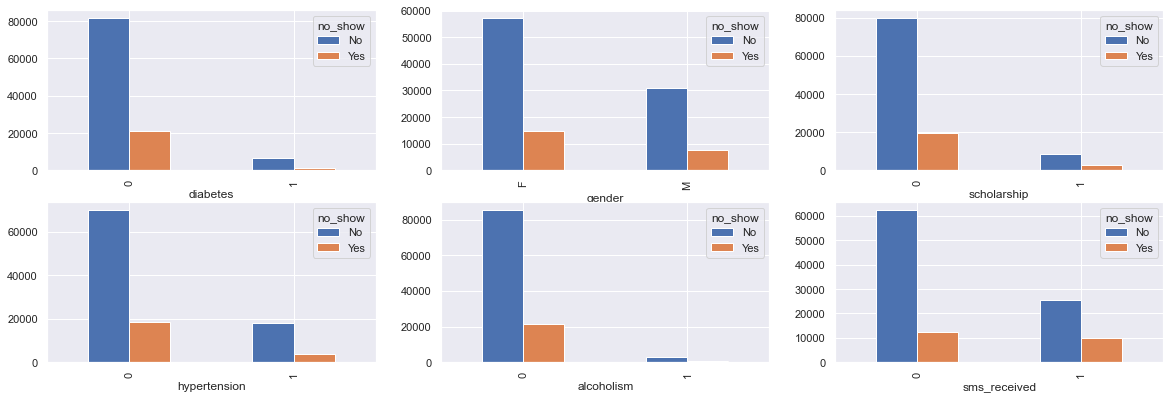

In [27]:
grouping = ['diabetes','gender','scholarship', 'hypertension', 'alcoholism', 'sms_received']

fig = plt.figure(figsize=(20, 10));
for i, num in enumerate(grouping):
    ax = fig.add_subplot(3, 3, i+1);
    df_app.groupby([num, 'no_show'])[num].count().unstack('no_show').plot(ax=ax, kind='bar', stacked=False);

For all categorical variables the distributions of show / no-show for different categories look very similar. There is no clear indication of any of these variables having bigger then others impact on show / no-show characteristics. The charts confirm about 20% no-show rate for most categories.

#### Question 2

Which gender has the lowest and highest no-show rate?

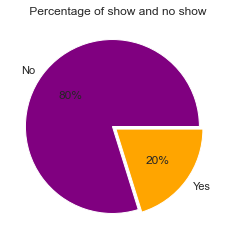

In [28]:
# Pie chart to show proportion of shows vs no show 
no_show_labels = ['No','Yes']
colors = ("purple", "orange")
explode = (0.05, 0)
plt.pie(df_app['no_show'].value_counts(), explode = explode, labels=no_show_labels, colors = colors, autopct='%1.0f%%')
plt.title(' Percentage of show and no show')
plt.show()

- Only 20% of patients showed up for their appointment.

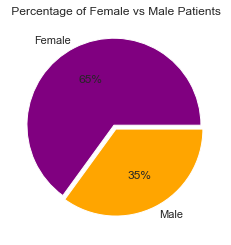

In [29]:
gender_labels = ['Female','Male']
plt.pie(df_app['gender'].value_counts(), explode = explode, labels=gender_labels, colors = colors,autopct='%1.0f%%')
plt.title(' Percentage of Female vs Male Patients ')
plt.show() 

- According to this plot, female patients have the highest show rate 65% than male patient 35%.

<AxesSubplot:title={'center':'Relationship between Gender and not showing up for appointment'}, xlabel='gender', ylabel='count'>

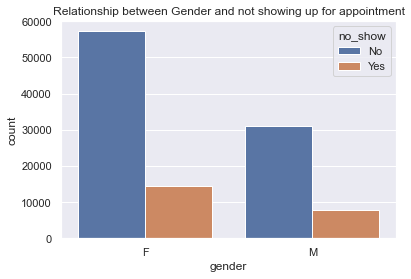

In [30]:
# Plot a bar chart to show this relationship - Gender and No show
plt.title("Relationship between Gender and not showing up for appointment")
sns.countplot(x='gender', hue='no_show', data= df_app)

In [31]:
gender_no_show = pd.crosstab(index=df_app["gender"],
            columns=df_app["no_show"])
gender_no_show

no_show,No,Yes
gender,,
F,57245,14594
M,30962,7725


- Out of 71839 appointments made by females, 14594 were missed with the ratio of 20%.
- Out of 38687 appointments made by males, 7725 were missed with the ratio of 20%.

#### Question 3

Which day of the week receives more appointments? And which has the highest no-show rate?

In [32]:
# create a new column for Day_of_week
df_app['day_of_week'] = df_app['appointment_day'].dt.day_name()
df_app['day_of_week'] # Checking to see the column has been created

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
110521    Tuesday
110522    Tuesday
110523    Tuesday
110524    Tuesday
110525    Tuesday
Name: day_of_week, Length: 110526, dtype: object

In [33]:
# Number of appointments on each weekday
df_app['day_of_week'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: day_of_week, dtype: int64

- The day with the most appointments is Wednesday, followed by Tuesday, Monday, Friday, and Thursday.
- Saturday has the fewest appointments.

In [34]:
show=df_app.no_show=="Yes"
nshow=df_app.no_show=="No"

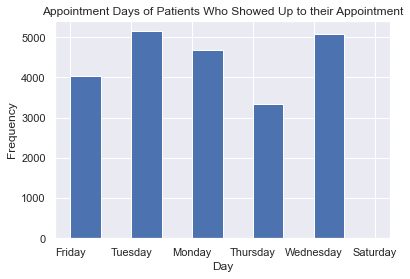

In [35]:
df_app.day_of_week[show].hist();
plt.xlabel('Day');
plt.ylabel('Frequency');
plt.title('Appointment Days of Patients Who Showed Up to their Appointment');

The maximum number of appointment showups were recorded among patients with Wednesday appointments, while the lowest number of showups were observed among patients with Thursday appointments. There were no appointments booked on Saturday or Sunday.

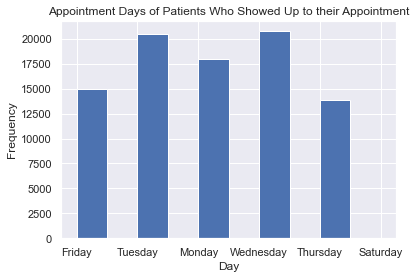

In [36]:
df_app.day_of_week[nshow].hist();
plt.xlabel('Day');
plt.ylabel('Frequency');
plt.title('Appointment Days of Patients Who Showed Up to their Appointment');

Patients who had appointments on Tuesdays had the largest number of failed appointments, whereas patients who had appointments on Thursdays had the lowest number of failed appointments. There were no appointments booked on Saturday or Sunday.

## Conclusions

This project investigated a medical appointments dataset that is focused on the question of whether or not patients show up for their appointment. I used the following - Python libraries NumPy, Pandas, Matplotlib, and seaborn. I successfully cleaned and analyzed the data.

My data wrangling and cleaning process began with fixing errors in column names, then I proceeded to change data types of patient_id and schedule and appointment days to int and datetime respectively.

There were no duplicate rows or missing values in the original data. I observed that some patients booked multiple hospital appointment during the period the data was collected. I observed that an entry recorded a -1 for age, so I dropped the row using the drop() function.

The handicap column had 5 unique values (0, 1, 2, 3, 4). What each value denotes was not communicated in any of the resources given to complete this project, therefore, i dropped the columns using the drop () function.

During my investigation, I discovered the following: 
Approximately 20% of the patients in the sample did not attend their visits. The majority of the patients were females, young, did not have a scholarship, and were not disabled. The majority of the patients made appointments on Wednesdays and Tuesdays. People missing appointments might be due to a variety of circumstances. The factors examined in the investigation were age, scholarship, gender, receiving as SMS, and the day of the week the appointment was scheduled.

The vast majority of patients do not drink alcohol, and majority do not have diabetes or hypertension.

**Limitation of Dataset**

- The handcap data does not specify the type of disability considered.
- The data are for a short period of the year 2016. If we had data for the whole year, or even for other years, we could have seasonality analyzes.

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1